In [1]:
import pandas as pd 
import numpy as np
#test

prelab = pd.read_excel("PHYS267_DataSet_PER.xlsx", sheet_name=0)
postlab = pd.read_excel("PHYS267_DataSet_PER.xlsx", sheet_name=1)
prelab.columns

Index([ 'Unnamed: 0',    'Question',             1,  'Unnamed: 3',
        'Unnamed: 4',  'Unnamed: 5',  'Unnamed: 6',             2,
        'Unnamed: 8',  'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17',             3, 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21',             4, 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28',             5, 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')

In [14]:

d = {}
d["Q1"] = pd.DataFrame(columns=["1", "2", "3", "4", "5"],\
    data=prelab[[1,'Unnamed: 3',
         'Unnamed: 4','Unnamed: 5','Unnamed: 6']].values[1:]
)
d["Q2"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10" ,"11"],\
    data=prelab[[2,
        'Unnamed: 8',  'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17']].values[1:]
)
d["Q3"] = pd.DataFrame(columns=["1", "2", "3", "4"],\
    data=prelab[[3, 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21']].values[1:]
)
d["Q4"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=prelab[[4, 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28']].values[1:]
)
d["Q5"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=prelab[[5, 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']].values[1:]
)
prelab_studentnum = prelab['Unnamed: 0'][1:].values
prelab_q = pd.concat(d, axis=1)
prelab_q.index = prelab_studentnum
print('rows with na values = ',prelab_q.isna().any(axis=1).sum(), "shape of pre-lab q is ", prelab_q.shape)


rows with na values =  125 shape of pre-lab q is  (248, 34)


rows with na values =  137 shape of pre-lab q is  (260, 34)


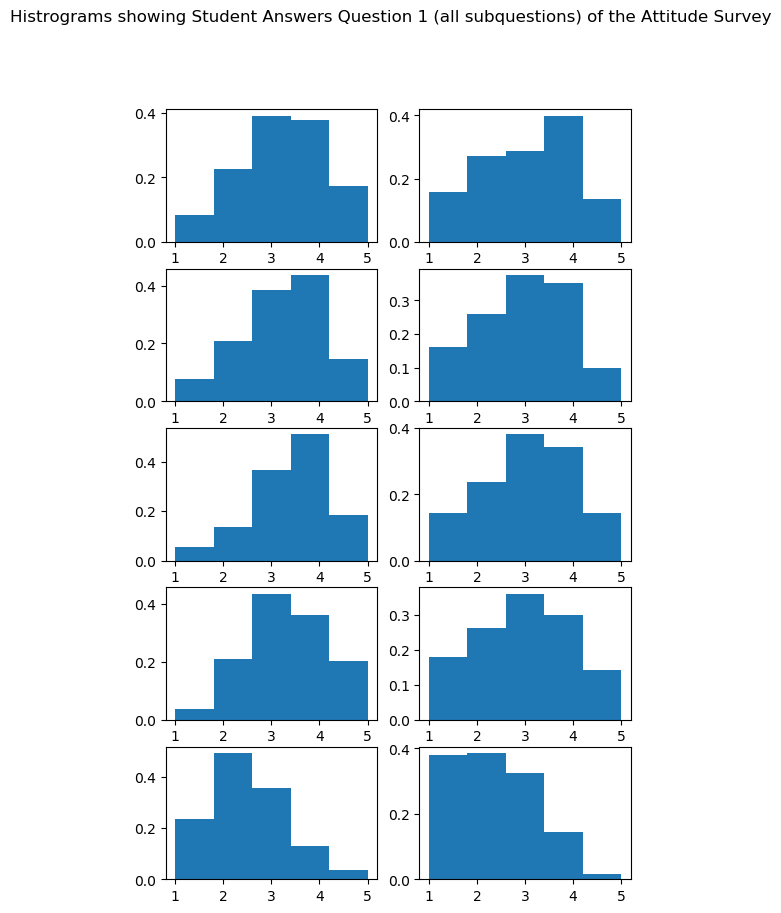

In [23]:
import matplotlib.pyplot as plt
d2 = {}
d2["Q1"] = pd.DataFrame(columns=["1", "2", "3", "4", "5"],\
    data=postlab[[1,'Unnamed: 3',
         'Unnamed: 4','Unnamed: 5','Unnamed: 6']].values[1:]
)
d2["Q2"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10" ,"11"],\
    data=postlab[[2,
        'Unnamed: 8',  'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17']].values[1:]
)
d2["Q3"] = pd.DataFrame(columns=["1", "2", "3", "4"],\
    data=postlab[[3, 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21']].values[1:]
)
d2["Q4"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=postlab[[4, 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28']].values[1:]
)
d2["Q5"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=postlab[[5, 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']].values[1:]
)
postlab_studentnum = postlab['Unnamed: 0'][1:].values
postlab_q = pd.concat(d2, axis=1)
postlab_q.index = postlab_studentnum
print('rows with na values = ',postlab_q.isna().any(axis=1).sum(), "shape of pre-lab q is ", postlab_q.shape)


fig, ax = plt.subplots(len(q_df.columns), 3, figsize=(12,60))
fig.suptitle("Histograms showing Student Answers Question 1 (all subquestions) of the Attitude Survey")

for side, q_df in enumerate((prelab_q, postlab_q)):
    y = 0
    for subq in q_df.columns:
        # ax[y,side].set_title('Q1 Before')
        ax[y,side].hist(q_df[subq], density=True, bins=5, color=['blue', 'orange'][side])
        y += 1

y = 0
for subq in prelab_q.columns:
    ax[y,2].hist((prelab_q[subq], postlab_q[subq]), density=True, bins=5, label=['Pre', 'Post'])
    y += 1

plt.show()

In [15]:
prelab_q.head()


Q1                       Q2                      ...   Q4             Q5  \
     1    2    3    4    5    1    2    3    4    5  ...    5    6    7    1   
1  4.0  3.0  3.0  4.0  2.0  4.0  5.0  5.0  4.0  4.0  ...  5.0  3.0  4.0  3.0   
2  4.0  2.0  4.0  2.0  3.0  4.0  4.0  4.0  3.0  4.0  ...  5.0  5.0  5.0  4.0   
3  1.0  1.0  1.0  1.0  1.0  4.0  4.0  4.0  5.0  5.0  ...  5.0  5.0  4.0  5.0   
4  2.0  3.0  3.0  2.0  3.0  4.0  3.0  1.0  2.0  3.0  ...  3.0  2.0  3.0  2.0   
5  NaN  NaN  NaN  NaN  NaN  5.0  4.0  4.0  3.0  4.0  ...  4.0  5.0  5.0  5.0   

                                 
     2    3    4    5    6    7  
1  3.0  3.0  3.0  4.0  2.0  4.0  
2  4.0  4.0  5.0  5.0  4.0  5.0  
3  4.0  5.0  5.0  5.0  5.0  4.0  
4  4.0  2.0  4.0  4.0  2.0  3.0  
5  5.0  5.0  4.0  5.0  4.0  5.0  

[5 rows x 34 columns]

In [16]:
postlab_q.head()

Q1                       Q2                      ...   Q4             Q5  \
     1    2    3    4    5    1    2    3    4    5  ...    5    6    7    1   
1  3.0  3.0  4.0  2.0  4.0  4.0  5.0  4.0  3.0  2.0  ...  5.0  4.0  3.0  3.0   
2  3.0  4.0  2.0  1.0  2.0  5.0  5.0  3.0  3.0  3.0  ...  4.0  4.0  5.0  4.0   
3  2.0  4.0  3.0  1.0  1.0  4.0  4.0  5.0  5.0  5.0  ...  5.0  5.0  5.0  4.0   
4  1.0  3.0  4.0  2.0  1.0  4.0  2.0  1.0  3.0  4.0  ...  5.0  4.0  4.0  2.0   
5  NaN  NaN  NaN  NaN  NaN  5.0  4.0  5.0  5.0  4.0  ...  5.0  5.0  5.0  5.0   

                                 
     2    3    4    5    6    7  
1  4.0  4.0  3.0  4.0  3.0  5.0  
2  4.0  4.0  3.0  3.0  3.0  4.0  
3  4.0  5.0  5.0  5.0  5.0  4.0  
4  4.0  4.0  5.0  5.0  2.0  1.0  
5  5.0  4.0  2.0  5.0  2.0  3.0  

[5 rows x 34 columns]

In [ ]:
# instead of dropping whole rows (all questions and subquestions) when Nan observed for any q., 
# we can treat each column (question::subquestion) as a sample and drop NaN from them when plotting/comparing/testing
# OR to make it simpler, we can dropna for all columns for the whole dataframe.